In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, tests_carried_out, daily_vaccinations, population_vaccinated, unique_people_tested
from heatmap import heatmap
from maps import case_maps
from phe import *
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
64,876 cases (7 day average) as of Thu 16 Dec, +5,382.1 since Wed 15 Dec
799 hospitalised (7 day average) as of Sun 19 Dec, +22.0 since Sat 18 Dec
84 died (7 day average) as of Thu 16 Dec, -1.1 since Wed 15 Dec


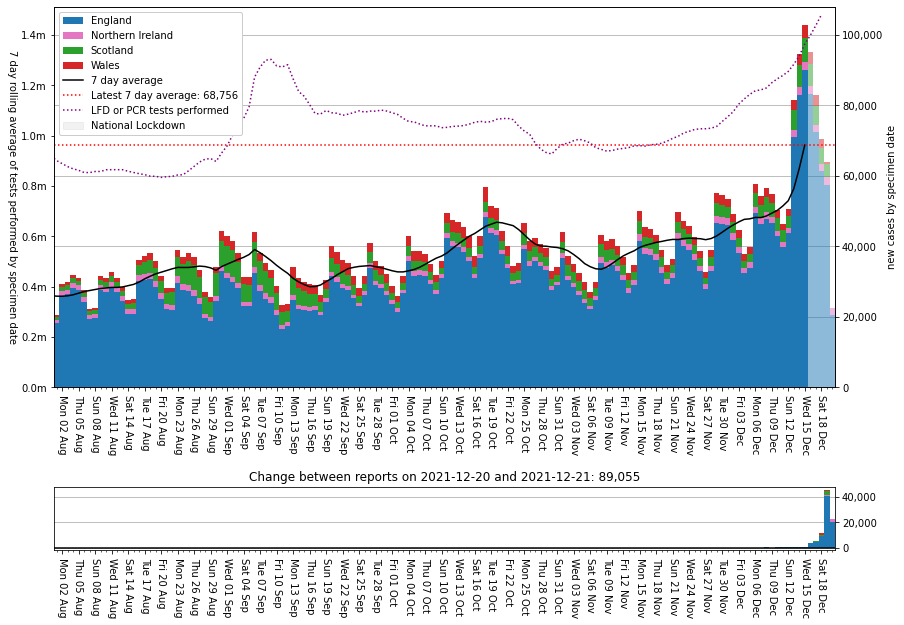

In [3]:
plot_areas(for_date, 'cases_nations', date_format='%a %d %b', earliest='2021-08', diff_ylims=None)

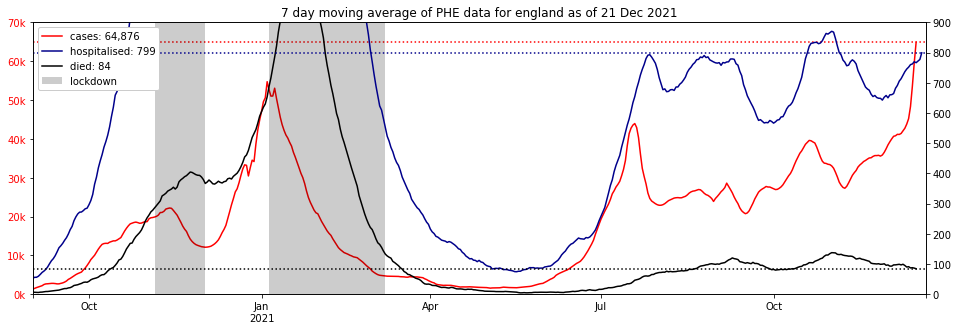

In [4]:
plot_summary(earliest_date='2020-09-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=70_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=900)

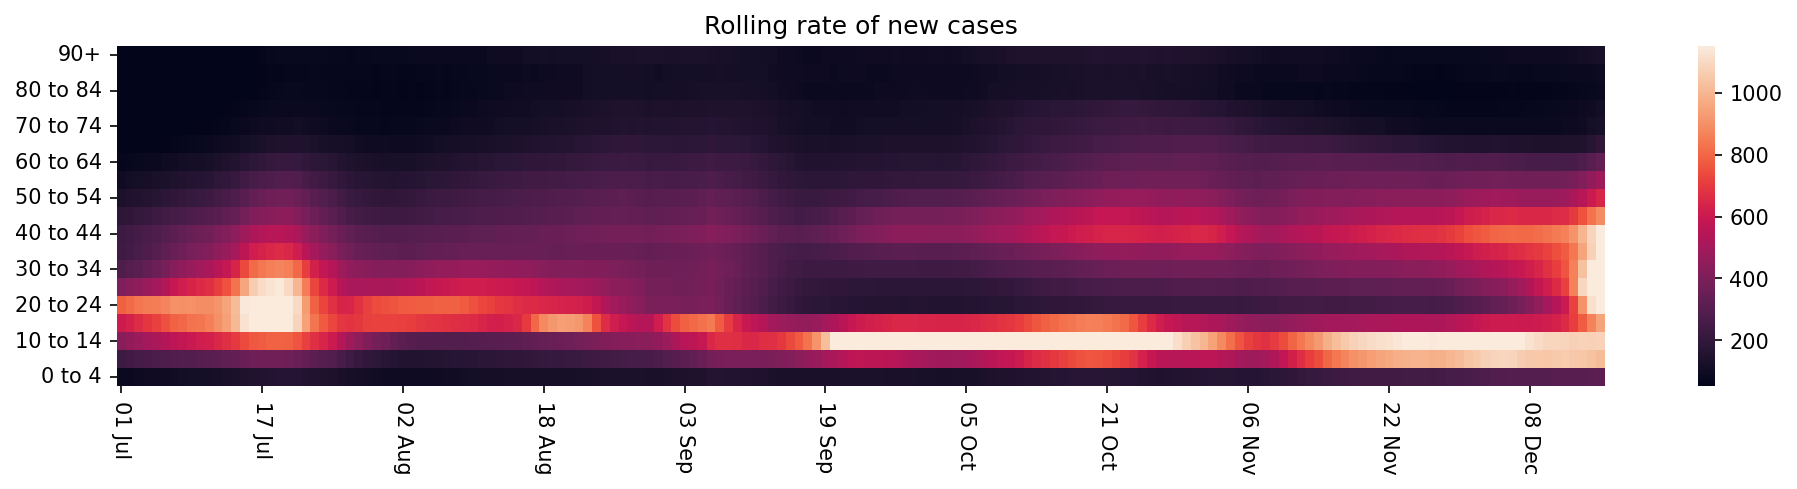

In [5]:
data = load_demographic_data('case_demographics_nation', 'England', 'rollingRate', start='2021-07')[0]
heatmap(data, title='Rolling rate of new cases', figsize=(16, 3))

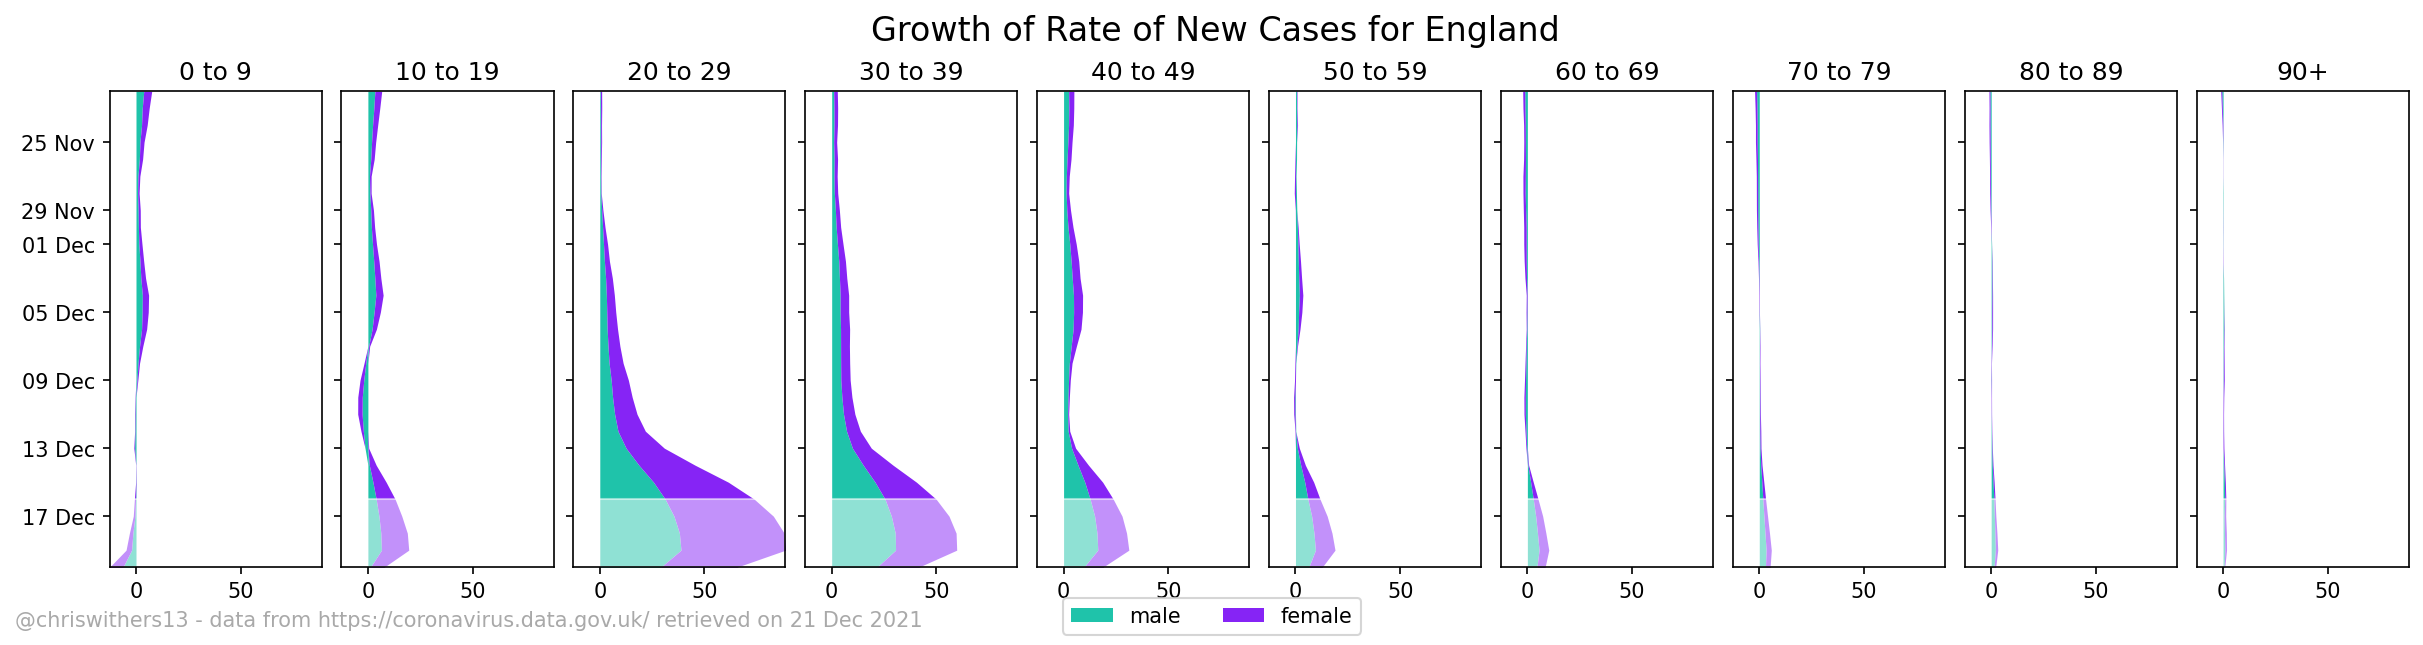

In [6]:
demographic_stream_plot('Growth of Rate of New Cases', order=2, figsize=(16, 4))

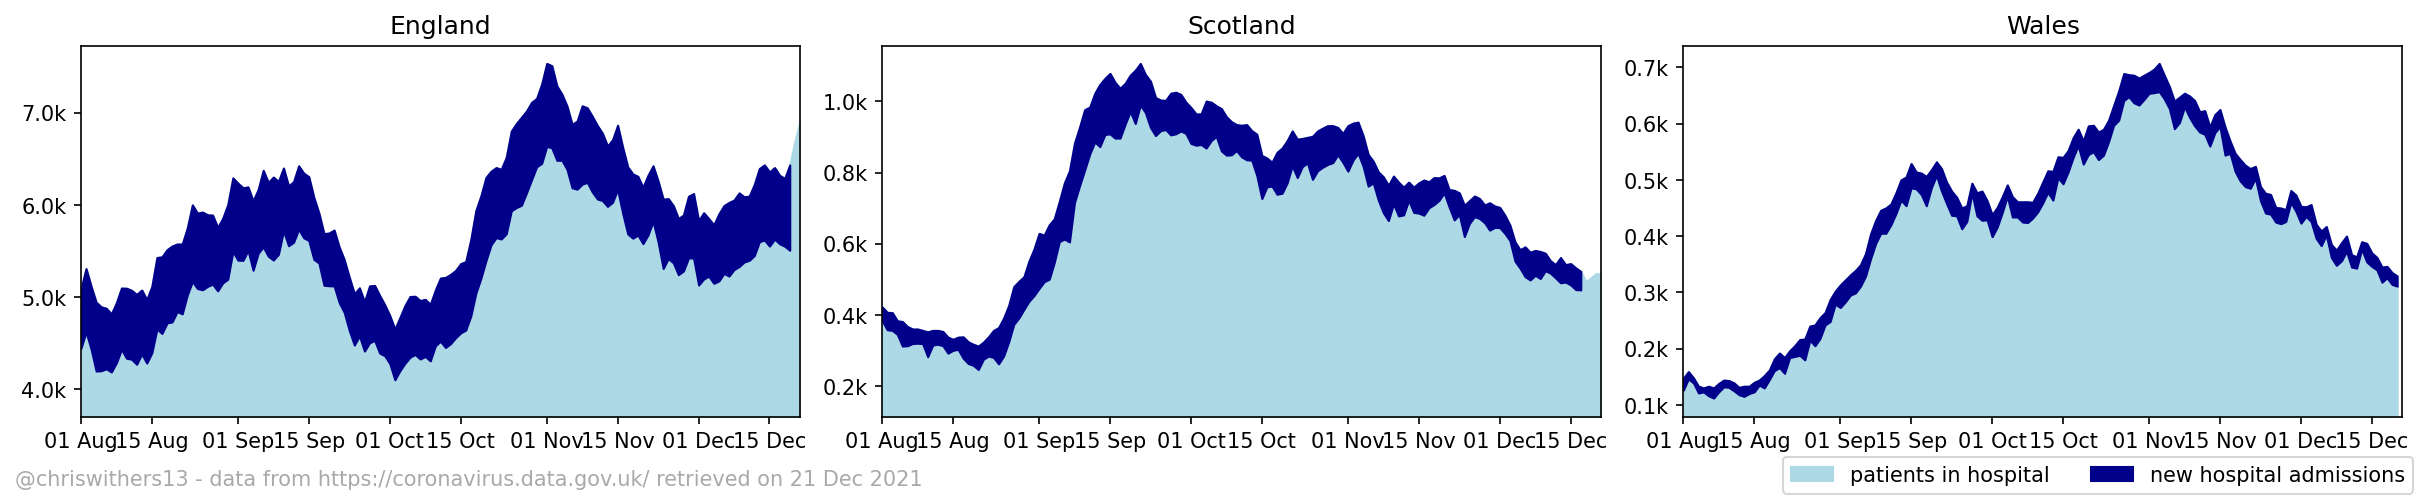

In [7]:
hospital_plot(start='2021-08', figsize=(16,3), figs=(1, 3), ymin=None)

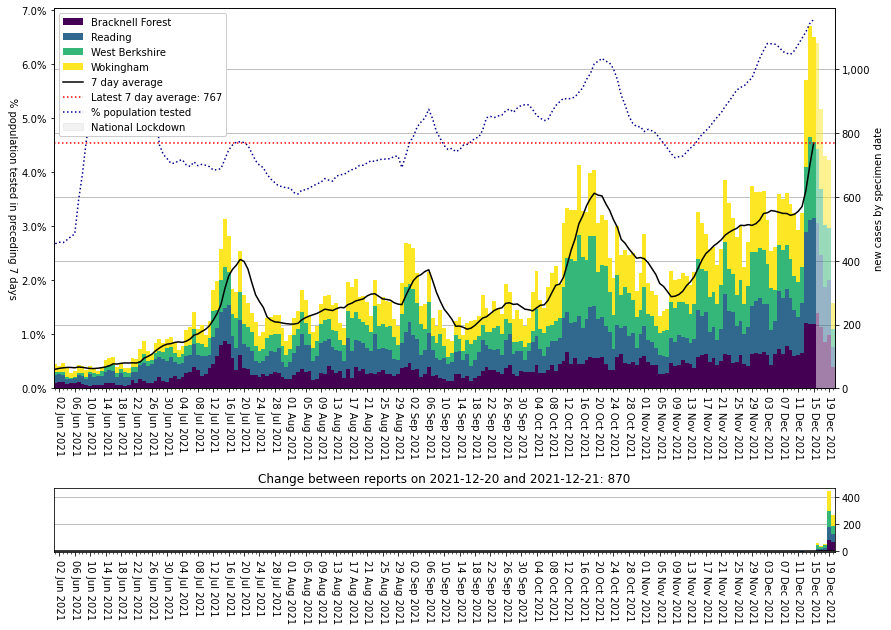

In [8]:
plot_areas(for_date, areas=my_areas, lines=unique_people_tested)

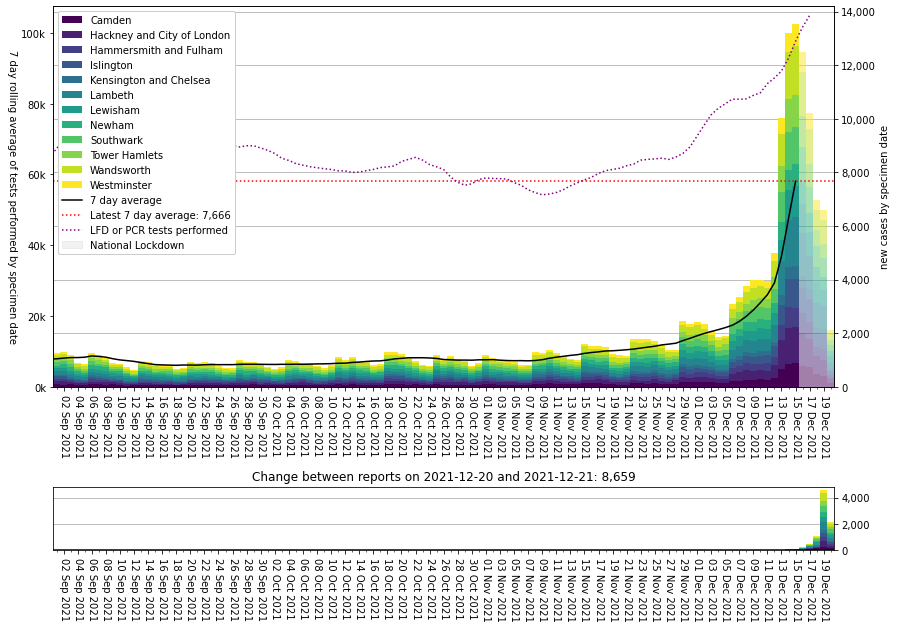

In [9]:
plot_areas(for_date, areas=london_areas, earliest='2021-09', lines=tests_carried_out)

In [13]:
data = recent_cases_summed(days=7, exclude_days=1)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [14]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  \
areaCode                                                    
E09000022                     Lambeth         2899.390861   
E09000032                  Wandsworth         2827.616121   
E09000012  Hackney and City of London         2515.119945   
E09000028                   Southwark         2406.925321   
E09000019                   Islington         2340.524690   
E09000013      Hammersmith and Fulham         2242.050739   
E09000023                    Lewisham         2104.027570   
E09000030               Tower Hamlets         2018.198895   
E09000024                      Merton         1931.754362   
E09000014                    Haringey         1908.452356   

           newCasesBySpecimenDate Specimen date  
areaCode                                         
E09000022                  9453.0    2021-12-19  
E09000032                  9322.0    2021-12-19  
E09000012                  7315.0    2021-12-19  
E09000028                  7674.0    2021-12-19  
E09000019                  5675.0    2021-12-19  
E09000013                  4151.0    2021-12-19  
E09000023                  6435.0    2021-12-19  
E09000030                  6554.0    2021-12-19  
E09000024                  3990.0    2021-12-19  
E09000014                  5127.0    2021-12-19

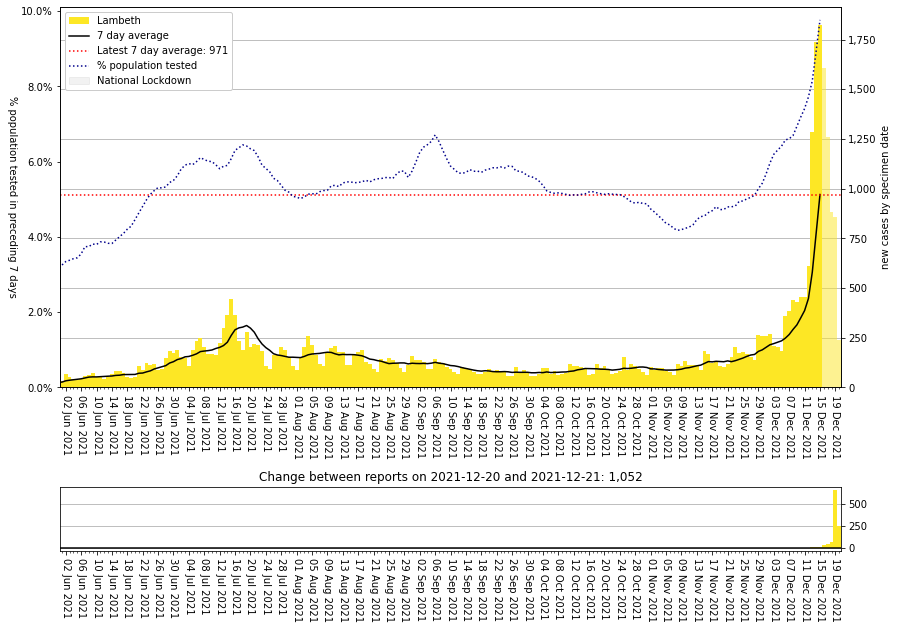

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [16]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  \
areaCode                                                    
E09000022                     Lambeth         2899.390861   
E09000032                  Wandsworth         2827.616121   
E09000028                   Southwark         2406.925321   
E09000012  Hackney and City of London         2515.119945   
E09000030               Tower Hamlets         2018.198895   
E09000023                    Lewisham         2104.027570   
E08000025                  Birmingham          560.335466   
E09000008                     Croydon         1614.129451   
E08000003                  Manchester         1065.373025   
E09000019                   Islington         2340.524690   

           newCasesBySpecimenDate Specimen date  
areaCode                                         
E09000022                  9453.0    2021-12-19  
E09000032                  9322.0    2021-12-19  
E09000028                  7674.0    2021-12-19  
E09000012                  7315.0    2021-12-19  
E09000030                  6554.0    2021-12-19  
E09000023                  6435.0    2021-12-19  
E08000025                  6398.0    2021-12-19  
E09000008                  6242.0    2021-12-19  
E08000003                  5890.0    2021-12-19  
E09000019                  5675.0    2021-12-19

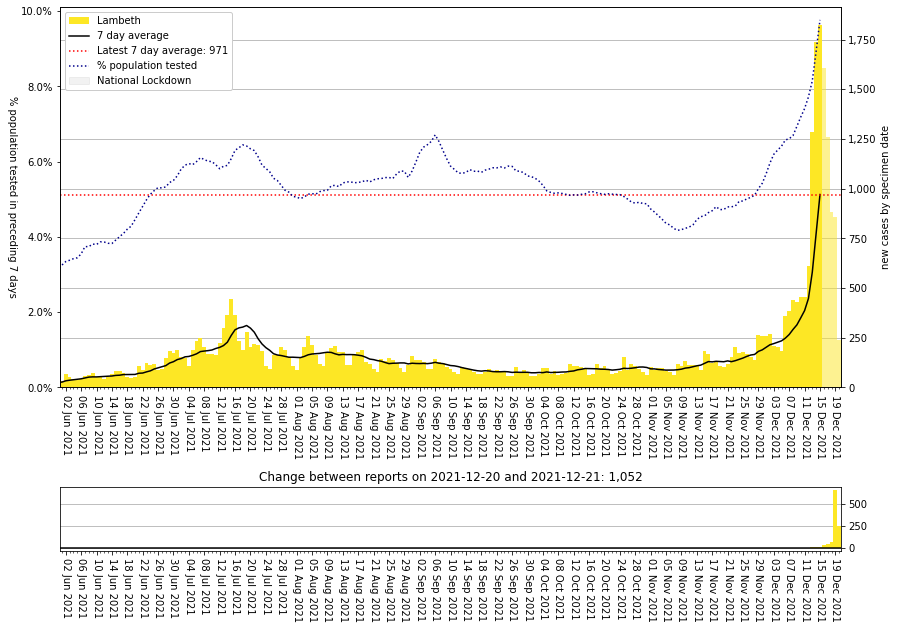

In [17]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

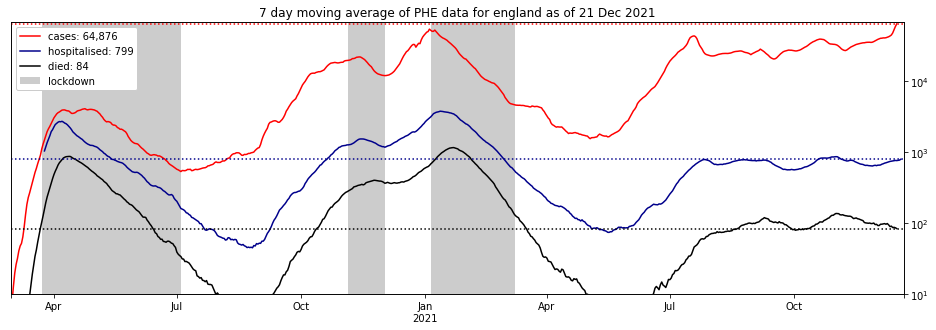

In [18]:
plot_summary(earliest_date='2020-02-29', show_latest='lines', log=True,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

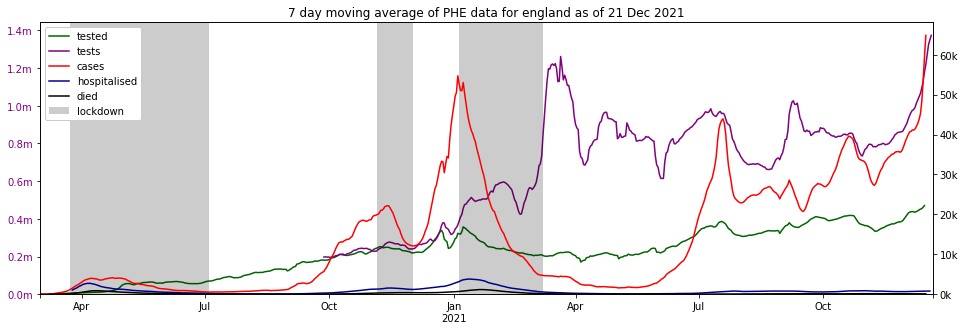

In [19]:
plot_summary(left_series=(s.unique_people_tested_sum, s.reported_virus_tests_sum), left_formatter=per1m_formatter,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

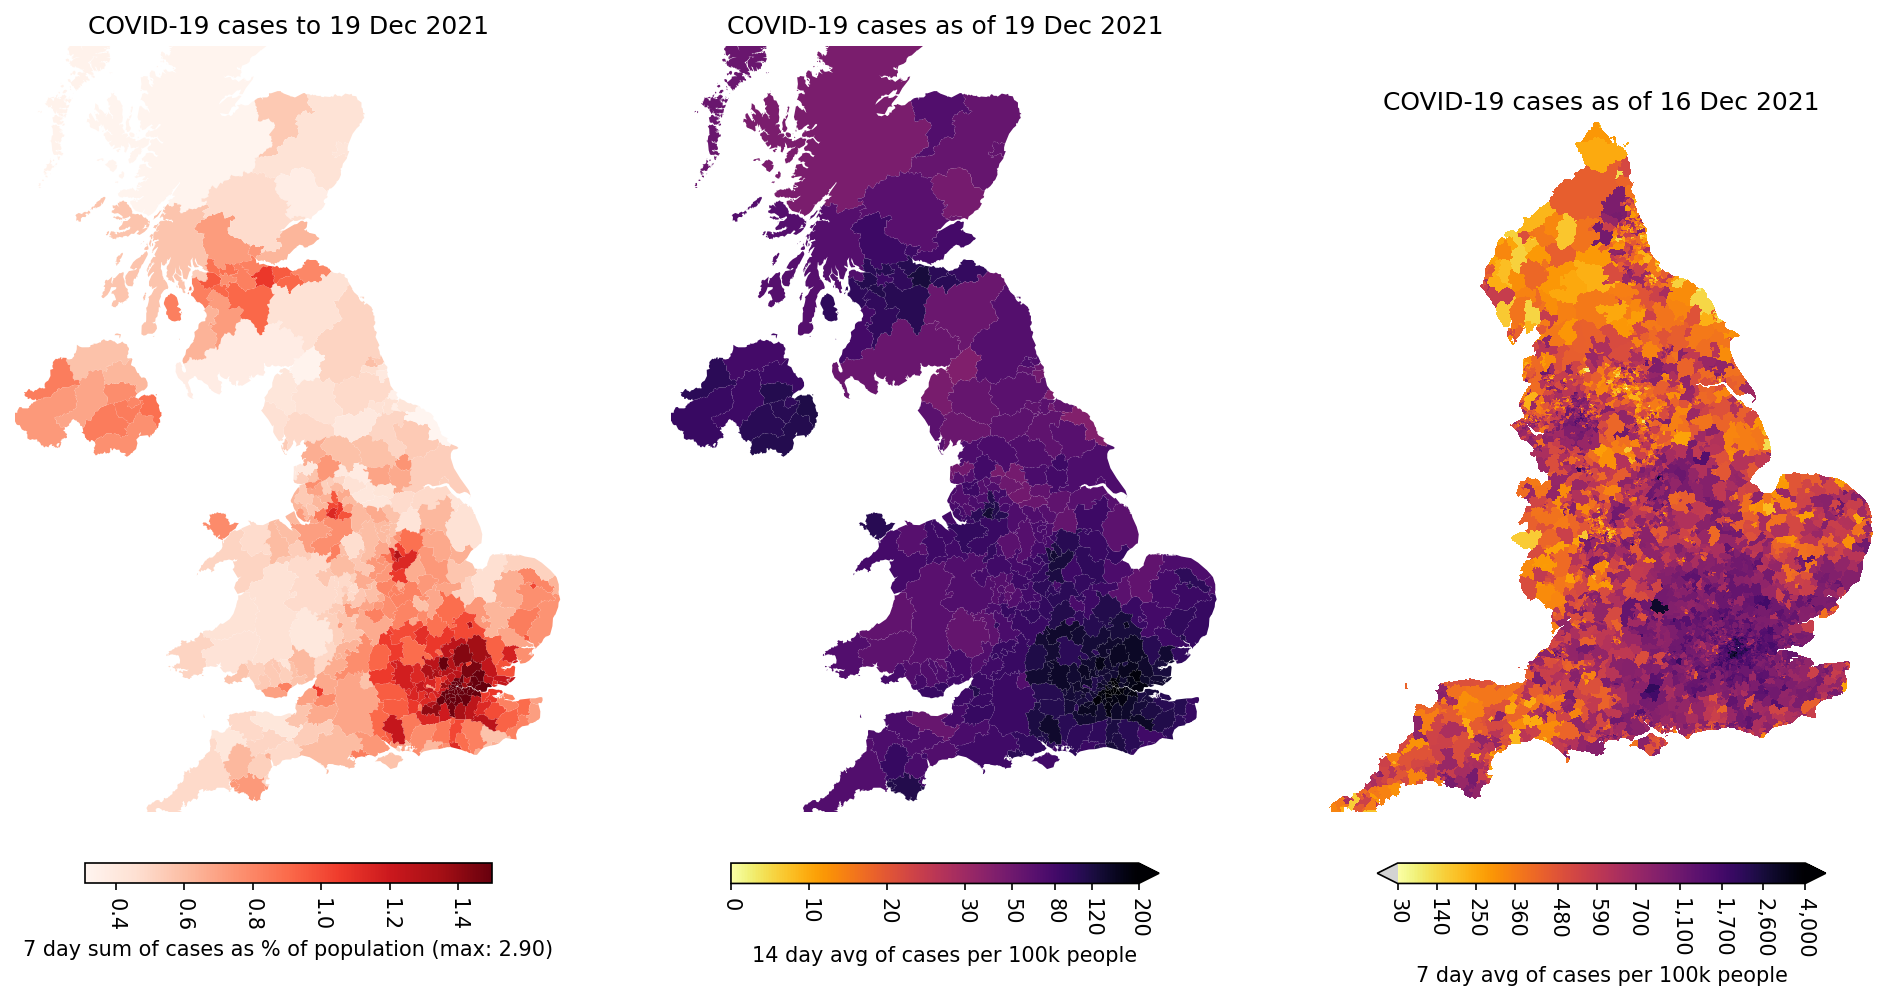

Loading BokehJS ...

In [20]:
case_maps(sum_vmax=1.5, exclude_days=1)